# Softmax Regression
This notebook is used to validate the training loop and to get reference results on a softmax regression model. The model is trained 3 times, on the following subsets of data:

- RGB images
- Depthmaps
- RGB + depthmaps

In [1]:
import numpy as np
import pathlib
import torch
from torch import nn
from torch.utils.tensorboard import SummaryWriter

import utils

DATA_PATH = pathlib.Path('../data')
RUNS_PATH = pathlib.Path('runs/softmax-reg')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## RGB images

Trainin set: 8370 samples of shape (28, 28, 3)

Sample: 5373
Label: ok


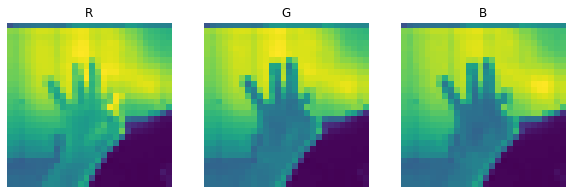

Validation set: 1440 samples of shape (28, 28, 3)

Sample: 742
Label: hi


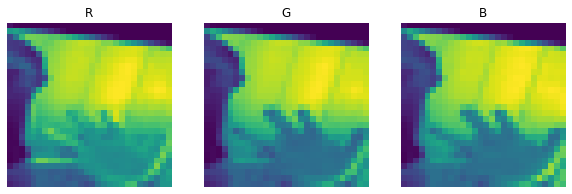

Test set: 9 samples of shape (28, 28, 3)

Sample: 5
Label: fist


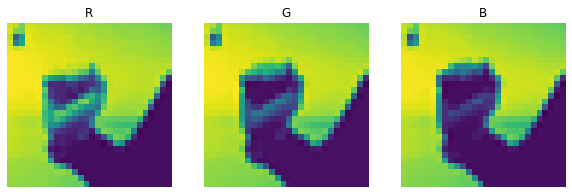

In [2]:
# Dataset filenames
train_ds = utils.HandDataset(DATA_PATH/'training_set.mat', depth=False)
valid_ds = utils.HandDataset(DATA_PATH/'validation_set.mat', depth=False)
test_ds = utils.HandDataset(DATA_PATH/'test_set.mat', depth=False)

# Data loaders
batch_size = 256
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=False)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Visualization
print(f'Trainin set: {train_ds}')
train_ds.show_sample()
print(f'Validation set: {valid_ds}')
valid_ds.show_sample()
print(f'Test set: {test_ds}')
test_ds.show_sample()

In [3]:
net = utils.SoftmaxRegression(n_inputs=np.prod(train_ds.sample_shape), n_outputs=len(train_ds.classes))
loss_function = nn.CrossEntropyLoss()
n_epochs, lr = 10, 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.5)

utils.train(net, n_epochs, train_dl, loss_function, optimizer, valid_iter=valid_dl, log_dir=RUNS_PATH)

KeyboardInterrupt: 

## Depth-maps

In [ ]:
# Dataset filenames
train_ds = utils.HandDataset(DATA_PATH/'training_set.mat', rgb=False)
valid_ds = utils.HandDataset(DATA_PATH/'validation_set.mat', rgb=False)
test_ds = utils.HandDataset(DATA_PATH/'test_set.mat', rgb=False)

# Data loaders
batch_size = 256
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=False)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Visualization
print(f'Trainin set: {train_ds}')
train_ds.show_sample()
print(f'Validation set: {valid_ds}')
valid_ds.show_sample()
print(f'Test set: {test_ds}')
test_ds.show_sample()

In [ ]:
net = utils.SoftmaxRegression(n_inputs=np.prod(train_ds.sample_shape), n_outputs=len(train_ds.classes))
loss_function = nn.CrossEntropyLoss()
n_epochs, lr = 10, 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.5)

utils.train(net, n_epochs, train_dl, loss_function, optimizer, valid_iter=valid_dl, log_dir=RUNS_PATH)

## RGB + Depth-maps

In [ ]:
# Dataset filenames
train_ds = utils.HandDataset(DATA_PATH/'training_set.mat')
valid_ds = utils.HandDataset(DATA_PATH/'validation_set.mat')
test_ds = utils.HandDataset(DATA_PATH/'test_set.mat')

# Data loaders
batch_size = 256
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=False)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Visualization
print(f'Trainin set: {train_ds}')
train_ds.show_sample()
print(f'Validation set: {valid_ds}')
valid_ds.show_sample()
print(f'Test set: {test_ds}')
test_ds.show_sample()

In [ ]:
net = utils.SoftmaxRegression(n_inputs=np.prod(train_ds.sample_shape), n_outputs=len(train_ds.classes))
loss_function = nn.CrossEntropyLoss()
n_epochs, lr = 10, 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.5)

utils.train(net, n_epochs, train_dl, loss_function, optimizer, valid_iter=valid_dl, log_dir=RUNS_PATH)